# **Data Visualisation in Python : An Overview**
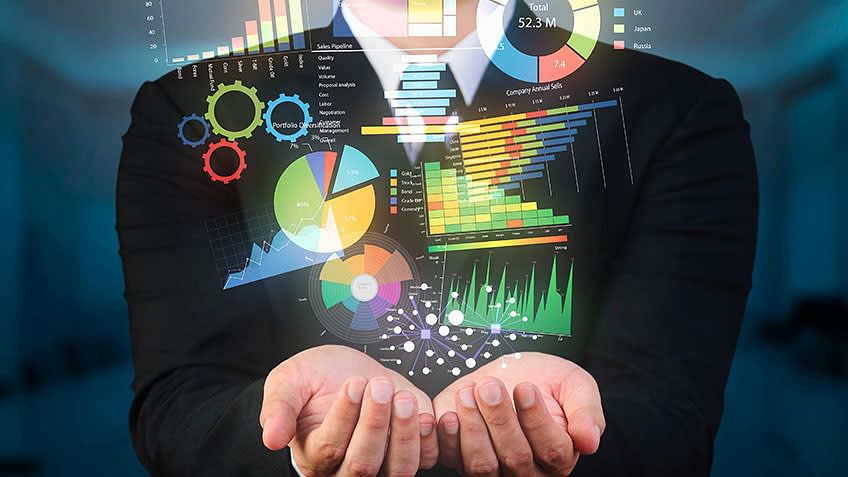

Because it is the final outcome of the process, the exact visualisation is just as crucial as the data that is being visualised. As a result, it's important to pay a lot of attention to developing the greatest possible visualisation for the data at hand.



### **Choosing a Visualization**

The first step in producing a visualisation is choosing the graphs or plot that will represent your data after it has been cleaned and prepped and the elements that you want to visualise have been chosen.

Relationship : Are used when showing a link between two or more variables. ex. scatter plots, bubble charts.

Comparison : are used when you want to show the differences or
similarities between two or more variables. ex. simple, paired bar, paired column, stacked bar, and stacked column, box plots, and violin plots.



### **Plotting with pandas and seaborn**

**Histograms**

Histograms are important for figuring out how a numerical feature in a dataset is distributed statistically. They can be made with the hist() and distplot() functions in pandas and seaborn, respectively.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe9fdc03a10>]],
      dtype=object)

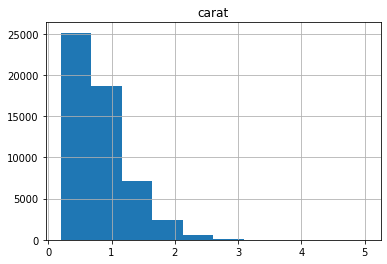

In [ ]:
#Import the necessary libraries
import seaborn as sns
import pandas as pd
#Import diamonds dataset from seaborn
diamonds_df = pd.read_csv('diamonds.csv')
#Plot a histogram using the diamonds dataset
diamonds_df.hist(column='carat')

Let's figure out what we get when use the same function in seaborn :

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


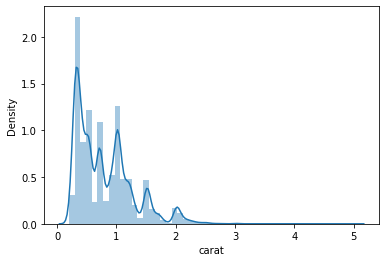

In [ ]:
sns.distplot(diamonds_df.carat)

The pandas hist function and the seaborn distplot have two important differences:


1.   The bins parameter in pandas is set to 10 by usual, however seaborn supposes a different value. optimal bin size based on the dataset's statistical distribution
2.   The distplot function also includes kernel density estimation (KDE) curve, And to remove it set kde to False (kde=False).



**Bar Plots**

Bar plots are helpful in understanding the values that a categorical feature in a dataset has. They may be made with pandas' plot(kind='bar') and the catplot(kind='count') in pandas, and
barplot() functions in seaborn.

Let's see an example of bar plots in the diamonds dataset, Get the counts of diamonds of each cut quality, we first need to create a table using the pandas crosstab() function

In [ ]:
cut_count_table = pd.crosstab(index=diamonds_df['cut'],columns='count')
cut_count_table

col_0,count
cut,
Fair,1610
Good,4906
Ideal,21551
Premium,13791
Very Good,12082


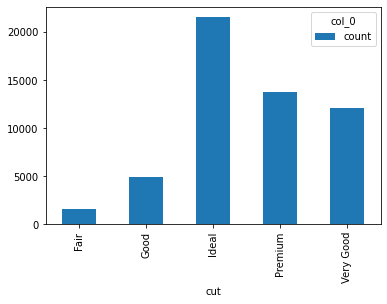

In [ ]:
cut_count_table.plot(kind='bar')

Generate the same bar plot using seaborn:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


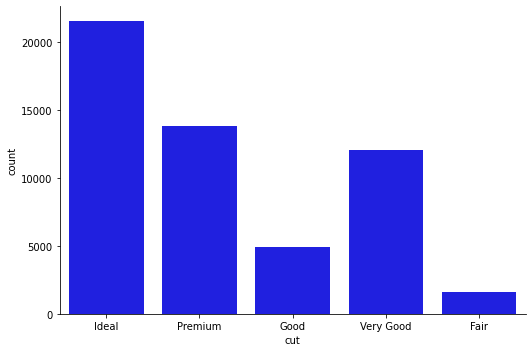

In [ ]:
sns.catplot("cut", data=diamonds_df, aspect=1.5, kind="count",
color="b")

Here's how we use seaborn to get the mean price distribution of various cut qualities:

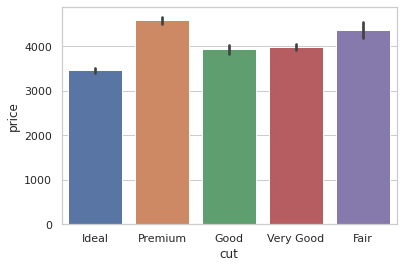

In [ ]:
from numpy import median, mean
sns.set(style="whitegrid")
ax = sns.barplot(x="cut", y="price", data=diamonds_df,estimator=mean)

**Scatter Plots**

Scatter plots is a type of plot displays values for typically two variables for a set of data. If the points are coded (color/shape/size), one additional variable can be displayed.

 The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

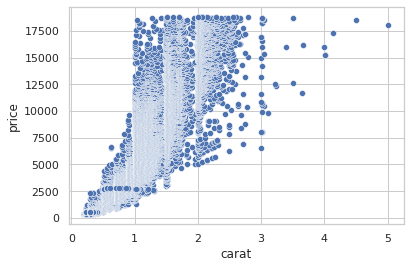

In [11]:
ax = sns.scatterplot(x="carat", y="price", data=diamonds_df)

Notice that the scatter plot shows a increase in price with an increase in carat. That's a useful insight into the relationships between different features in the dataset.

**Line Plots**

Information is represented as a series of data points connected by straight-line segments in a line plot. They can be used to show the link between a discrete numerical feature (on the x axis) and a continuous numerical characteristic (on the y axis).

We are going to visualize another dataset auto-mpg, We
can draw a simple line plot showing the relationship between model_year and mileage with the following code:

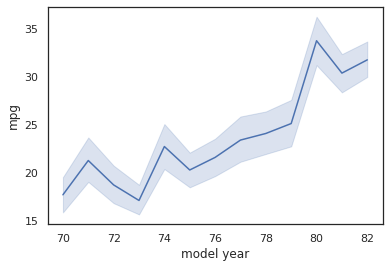

In [23]:
#read dataset
mpg_df = pd.read_csv('auto-mpg.csv')
# contour plot
sns.set_style("white")
# seaborn 2-D scatter plot
ax = sns.lineplot(x="model year", y="mpg", data=mpg_df)

To switch to a different confidence interval, utilise the ci parameter. A range of feature values where x percent of the data points are present is referred to as an x percent confidence interval. The code that follows is an example of converting to a 68 percent confidence interval:

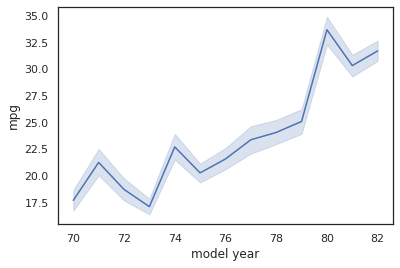

In [25]:
sns.lineplot(x="model year", y="mpg", data=mpg_df, ci=68)

**Box Plots**

Box plots are a great approach to look at the link between a numerical feature's summary statistics and other categorical data.

We will create a box plot to analyze the relationship between model_
year and mileage using the mpg dataset:

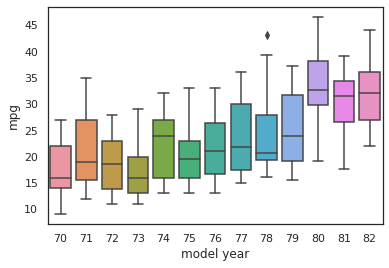

In [27]:
# box plot: mpg(mileage) vs model_year
sns.boxplot(x='model year', y='mpg', data=mpg_df)


The box boundaries represent the interquartile range, with the upper boundary representing the 25% quartile and the lower boundary representing the 75% quartile. The horizontal line within the box represents the median. Any single points beyond the whiskers (the T-shaped bars above and below the box) indicate outliers, whereas the whiskers themselves show the minimum and maximum values that are not outliers.

Use the hue parameter to group by origin:

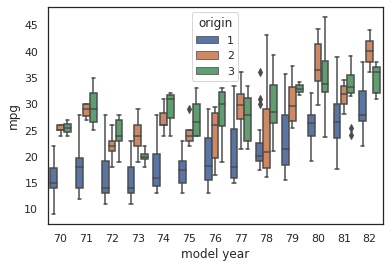

In [31]:
sns.boxplot(x='model year', y='mpg', data=mpg_df, hue='origin')

As we can see from the mpg dataset, Europe and Japan produced cars with better mileage than the United States in the 1970s and early 1980s. Exciting!

**Violin Plots**

A violin plot is similar to a box plot, but it includes more information about data differences. The structure of a violin plot indicates the shape of the data distribution: where data points cluster around a common value, the plot is thicker; where data points are limited, the plot is thinner.

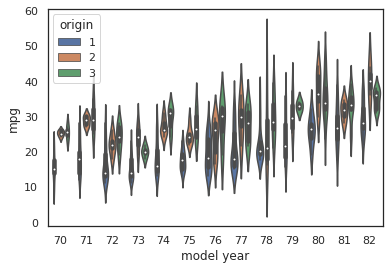

In [36]:
# code for violinplots
sns.violinplot(x='model year', y='mpg', data=mpg_df, hue='origin')


We can see here that, during the 70s, while most vehicles in the US had a median
mileage of 19 mpg, vehicles in Japan and Europe had median mileages of around 27 and
25 mpg.